In [1]:
# Importing necessary libraries
import numpy as np                              # For numerical operations
import pandas as pd                             # For data manipulation and analysis
import matplotlib.pyplot as plt                 # For data visualization
import seaborn as sns                           # For advanced visualizations
from sklearn.datasets import fetch_california_housing  # To load California housing dataset
from sklearn.model_selection import train_test_split   # For splitting data into training and testing sets
from sklearn.tree import DecisionTreeRegressor, plot_tree  # For Decision Tree regression and visualization
from sklearn.metrics import mean_squared_error, r2_score    # For model evaluation
from sklearn.ensemble import RandomForestRegressor          # For using the Random Forest Regressor model
from sklearn import tree                                      # Extra tree utilities



In [2]:
# Load the California housing dataset and convert it into a pandas DataFrame

housing = fetch_california_housing()
df= pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Prepare the dataset by splitting it into training and testing sets

X = df.drop(columns=['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train a Random Forest Regressor with 5 decision trees on the training dataset

rf_regressor = RandomForestRegressor(n_estimators=5, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [5]:
# Predict the housing prices on the test dataset using the trained Random Forest model

y_pred = rf_regressor.predict(x_test)

In [6]:
# Compute and print Mean Squared Error (MSE) and R² score to evaluate prediction accuracy

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.30980777229898254
R2: 0.7635793271846548


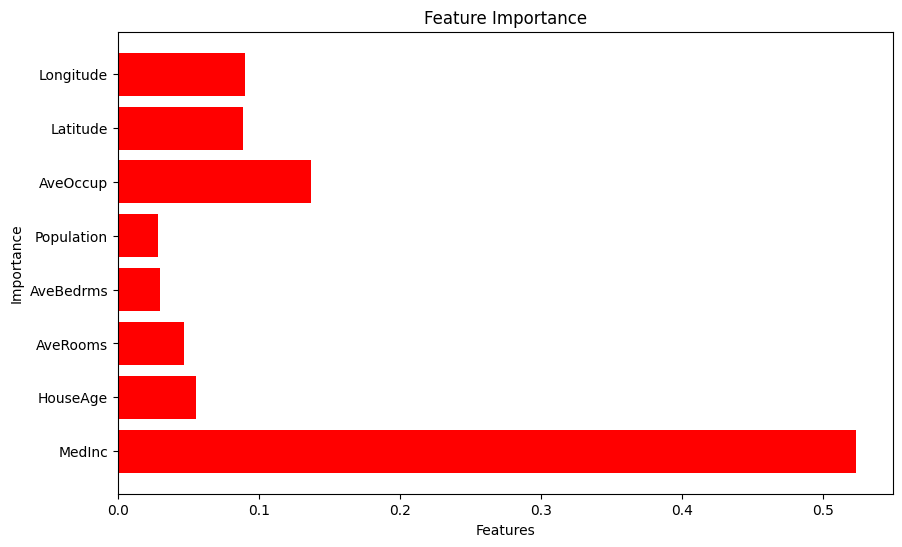

In [7]:
# Plot the importance of each input feature based on the trained Random Forest model

imp = rf_regressor.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(X.columns,imp,color='red')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [8]:
# Predict housing price for a single new input sample using the trained Random Forest model

new_data = np.array([[8.0, 30, 6.0, 1.2, 5000, 3.5,37.0,-120.0]])
predicted_price = rf_regressor.predict(new_data)
print('predicted house price:',predicted_price)

predicted house price: [3.6532]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


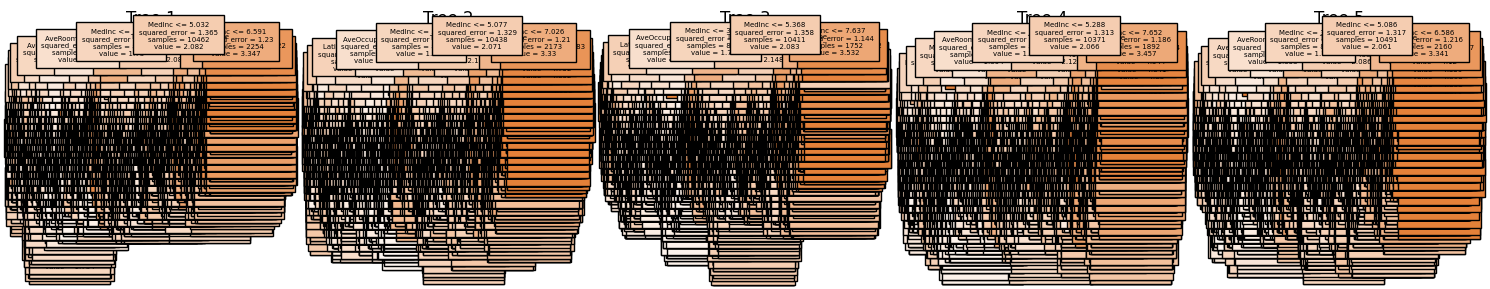

In [11]:
# Visualize each of the individual decision trees that make up the Random Forest ensemble

plt.figure(figsize=(15,3)) # Increased figure width to accommodate more subplots
for i, tree in enumerate(rf_regressor.estimators_):
    plt.subplot(1,5,i+1) # Changed the number of columns to 5
    tree_plot = plot_tree(tree, feature_names=X.columns, filled=True,fontsize=5) # Increased font size for better readability
    plt.title(f'Tree {i+1}')

plt.tight_layout()
plt.show()